In [1]:
from tensorflow.keras.datasets import mnist

2026-01-30 15:58:51.719384: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2026-01-30 15:58:52.861687: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2026-01-30 15:58:55.628867: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.


In [3]:
import matplotlib.pyplot as plt
import sys

In [4]:
# MNIST 데이터셋을 불러와 학습셋과 테스트셋으로 저장합니다. 
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [5]:
X_train.shape

(60000, 28, 28)

In [6]:
# 학습셋과 테스트셋이 각각 몇 개의 이미지로 되어 있는지 확인합니다. 
print("학습셋 이미지 수 : %d 개" % (X_train.shape[0]))
print("테스트셋 이미지 수 : %d 개" % (X_test.shape[0]))

학습셋 이미지 수 : 60000 개
테스트셋 이미지 수 : 10000 개


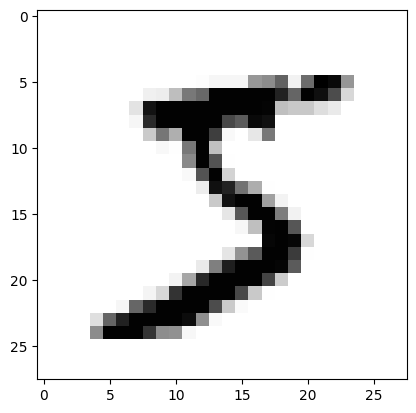

In [7]:
# 첫 번째 이미지를 확인해 봅시다.
plt.imshow(X_train[0], cmap='Greys')
plt.show()

In [8]:

# 이미지가 인식되는 원리를 알아봅시다.
for x in X_train[0]:
    for i in x:
        sys.stdout.write("%-3s" % i)
    sys.stdout.write('\n')

0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  3  18 18 18 12613617526 1662552471270  0  0  0  
0  0  0  0  0  0  0  0  30 36 94 15417025325325325325322517225324219564 0  0  0  0  
0  0  0  0  0  0  0  49 23825325325325325325325325325193 82 82 56 39 0  0  0  0  0  
0  0  0  0  0  0  0  18 2192532532532532531981822472410  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  80 15610725325320511 0  43 1540  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  14 1  15425390 0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  1392531902  0  0  0  0  0  0  0 

In [9]:
X_train.shape[0]

60000

In [10]:
X_train = X_train.reshape(X_train.shape[0], 784)

In [12]:
X_train.dtype

dtype('uint8')

In [13]:
X_train = X_train.astype('float64')

In [14]:
X_train.dtype

dtype('float64')

In [15]:

X_train = X_train / 255

In [16]:
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(60000, 784))

In [17]:
X_train.dtype

dtype('float64')

In [18]:
X_test = X_test.reshape(X_test.shape[0], 784).astype('float64') / 255

In [19]:
# 클래스 값을 확인해 봅니다.
print("class : %d " % (y_train[0]))

class : 5 


In [20]:
from tensorflow.keras.utils import to_categorical

In [ ]:
to_categorical()

In [21]:
y_train

array([5, 0, 4, ..., 5, 6, 8], shape=(60000,), dtype=uint8)

In [22]:
y_train = to_categorical(y_train, 10)

In [23]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], shape=(60000, 10))

In [24]:
y_test = to_categorical(y_test, 10)

In [25]:
# 딥러닝 기본 프레임 만들기

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [30]:
# 모델 구조를 설정합니다.
model = Sequential()

In [27]:
model

<Sequential name=sequential, built=False>

In [31]:
model.add(Dense(512, input_dim=784, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 407,050 (1.55 MB)

 Trainable params: 407,050 (1.55 MB)

 Non-trainable params: 0 (0.00 B)

In [32]:

# 모델 실행 환경을 설정합니다.
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [33]:
# 모델 최적화를 위한 설정구간입니다.
MODEL_DIR = './data/model/'

In [35]:
import os

In [36]:
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

In [37]:
modelpath="./data/model/MNIST_MLP.keras"

In [38]:
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping

In [39]:
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)

In [40]:
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

In [41]:
# 모델을 실행합니다.
history = model.fit(X_train, y_train, validation_split=0.25, epochs=30, batch_size=200, verbose=1, callbacks=[early_stopping_callback,checkpointer])

# 테스트 정확도를 출력합니다.
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, y_test)[1]))

Epoch 1/30
220/225 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8320 - loss: 0.6130
Epoch 1: val_loss improved from None to 0.18459, saving model to ./data/model/MNIST_MLP.keras
225/225 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - accuracy: 0.9036 - loss: 0.3455 - val_accuracy: 0.9491 - val_loss: 0.1846
Epoch 2/30
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9569 - loss: 0.1559
Epoch 2: val_loss improved from 0.18459 to 0.13358, saving model to ./data/model/MNIST_MLP.keras
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9586 - loss: 0.1458 - val_accuracy: 0.9612 - val_loss: 0.1336
Epoch 3/30
224/225 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9712 - loss: 0.1028
Epoch 3: val_loss improved from 0.13358 to 0.11348, saving model to ./data/model/MNIST_MLP.keras
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9722 - loss: 0.0990 - val_accuracy: 0.9667 - val_loss: 0.1135
Epoch 4/30
214/225 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9813 - loss: 0.0697
Epoch 4: val_los

In [42]:

# 검증셋과 학습셋의 오차를 저장합니다. 
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

In [43]:
import matplotlib.pyplot as plt
import numpy as np


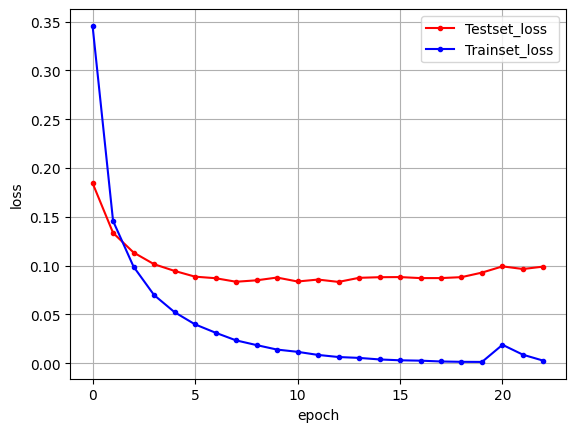

In [44]:
# 그래프로 표현해 봅니다.
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시해 보겠습니다.
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()